In [3]:
import math
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
data=yf.download('AAPL',start='2016-01-01',end='2021-10-01')
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,25.652500,26.342501,25.500000,26.337500,24.111498,270597600
2016-01-05,26.437500,26.462500,25.602501,25.677500,23.507273,223164000
2016-01-06,25.139999,25.592501,24.967501,25.174999,23.047251,273829600
2016-01-07,24.670000,25.032499,24.107500,24.112499,22.074556,324377600
2016-01-08,24.637501,24.777500,24.190001,24.240000,22.191273,283192000


In [32]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-09-24,145.660004,147.470001,145.559998,146.919998,145.859360,53477900
2021-09-27,145.470001,145.960007,143.820007,145.369995,144.320541,74150700
2021-09-28,143.250000,144.750000,141.690002,141.910004,140.885529,108972300
2021-09-29,142.470001,144.449997,142.029999,142.830002,141.798874,74602000
2021-09-30,143.660004,144.380005,141.279999,141.500000,140.478485,89056700


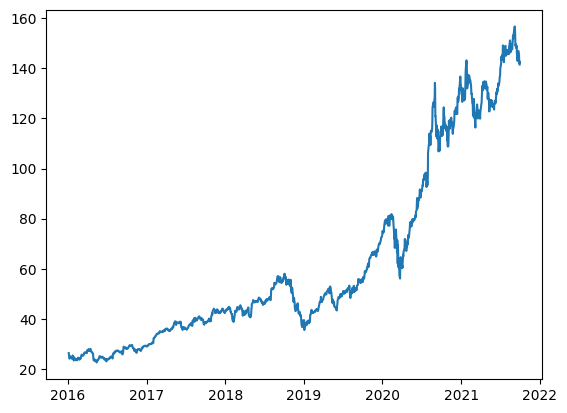

In [6]:
plt.plot(data['Close'])

In [15]:
closingprice=data['Close']
values= closingprice.values
train_data_len=math.ceil(len(values)*.8)
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(values.reshape(-1,1))
train_data=scaled_data[0: train_data_len,:]


x_train=[]
y_train=[]

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    
x_train,y_train=np.array(x_train),np.array(y_train)
print(x_train.shape)
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

(1098, 60)


In [16]:
x_train.shape

(1098, 60, 1)

In [17]:
test_data=scaled_data[train_data_len-60:,:]

In [19]:
x_test=[]
y_test=values[train_data_len:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])
    
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [20]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [24]:
model=Sequential()
model.add(LSTM(100,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(100,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 25)                2525      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,batch_size=20,epochs=10)

Epoch 1/10
55/55 [==============================] - 8s 39ms/step - loss: 0.0039
Epoch 2/10
55/55 [==============================] - 2s 38ms/step - loss: 2.5278e-04
Epoch 3/10
55/55 [==============================] - 2s 38ms/step - loss: 2.3977e-04
Epoch 4/10
55/55 [==============================] - 2s 38ms/step - loss: 2.1276e-04
Epoch 5/10
55/55 [==============================] - 2s 39ms/step - loss: 2.0646e-04
Epoch 6/10
55/55 [==============================] - 2s 39ms/step - loss: 2.4567e-04
Epoch 7/10
55/55 [==============================] - 2s 38ms/step - loss: 1.8797e-04
Epoch 8/10
55/55 [==============================] - 2s 40ms/step - loss: 2.0765e-04
Epoch 9/10
55/55 [==============================] - 2s 38ms/step - loss: 2.2540e-04
Epoch 10/10
55/55 [==============================] - 3s 59ms/step - loss: 1.6815e-04


In [28]:
pred=model.predict(x_test)
prediction=scaler.inverse_transform(pred)
rmse=np.sqrt(pow(np.mean(prediction- y_test),2))
print(rmse)

10/10 [==============================] - 0s 13ms/step
0.40821624544665064


C:\Users\indra\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


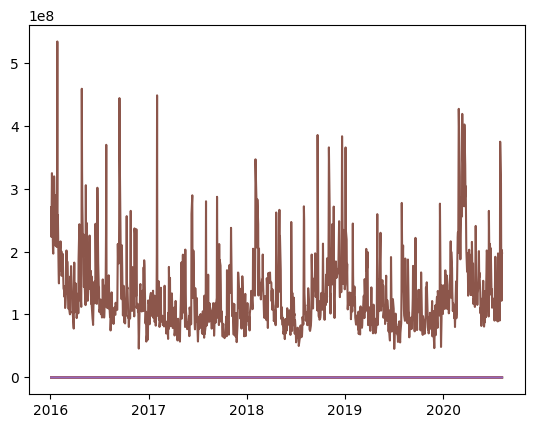

In [33]:
vizdata=data.filter(['Close'])
train=data[:train_data_len]
valid=data[train_data_len:]
valid['Prediction']=prediction


plt.plot(train)
#plt.plot(valid['Close'])
plt.show()

In [35]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,25.652500,26.342501,25.500000,26.337500,24.111498,270597600
2016-01-05,26.437500,26.462500,25.602501,25.677500,23.507273,223164000
2016-01-06,25.139999,25.592501,24.967501,25.174999,23.047251,273829600
2016-01-07,24.670000,25.032499,24.107500,24.112499,22.074556,324377600
2016-01-08,24.637501,24.777500,24.190001,24.240000,22.191273,283192000
...,...,...,...,...,...,...
2021-09-24,145.660004,147.470001,145.559998,146.919998,145.859360,53477900
2021-09-27,145.470001,145.960007,143.820007,145.369995,144.320541,74150700
2021-09-28,143.250000,144.750000,141.690002,141.910004,140.885529,108972300
